In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
import ipywidgets as widgets
import warnings
warnings.filterwarnings('ignore')

In [3]:
ten_important = ['Bankrupt?', 'Cash/Current Liability', "Net Income to Stockholder's Equity", 'Net Income to Total Assets', 
                 'Non-industry income and expenditure/revenue', 'Retained Earnings to Total Assets', 
                 'Realized Sales Gross Profit Growth Rate', 'ROA(A) before interest and % after tax', 
                 'Long-term fund suitability ratio (A)', 'Total expense/Assets', 'Working capitcal Turnover Rate', 
                 'Interest Expense Ratio', 'Cash Flow to Equity', 'Net Worth Turnover Rate (times)', 
                 'Contingent liabilities/Net worth', 'Liability-Assets Flag', 'Borrowing dependency', 
                 'Pre-tax net Interest Rate', 'Interest Coverage Ratio (Interest expense to EBIT)', 'Total Asset Turnover', 
                 'Inventory and accounts receivable/Net value']
importances = [0.01818181818181821, 0.016161616161616155, 0.012121212121212177, 0.012121212121212154, 0.010101010101010166, 
               0.010101010101010166, 0.008080808080808133, 0.008080808080808133, 0.00808080808080811, 0.006060606060606077, 
               0.004040404040404066, 0.004040404040404022, 0.004040404040404022, 0.004040404040404, 0.0020202020202020774, 
               0.0020202020202020553, 0.002020202020202033, 0.002020202020202033, 0.002020202020202033, 0.002020202020202033]

feat_importances = pd.Series(importances, index=ten_important[1:])

score_test = {'0': {'precision': 0.6962025316455697, 'recall': 0.9482758620689655, 'f1-score': 0.8029197080291972, 
                    'support': 58}, '1': {'precision': 0.85, 'recall': 0.4146341463414634, 
                                          'f1-score': 0.5573770491803278, 'support': 41}, 
              'accuracy': 0.7272727272727273, 'macro avg': {'precision': 0.7731012658227848, 
                                                            'recall': 0.6814550042052144, 'f1-score': 0.6801483786047625, 
                                                            'support': 99}, 
              'weighted avg': {'precision': 0.759896432681243, 'recall': 0.7272727272727273, 
                               'f1-score': 0.7012303240614837, 'support': 99}}

conf_test = np.array([[55, 3],[24, 17]])

score = {'0.0': {'precision': 0.5714285714285714, 'recall': 0.8, 'f1-score': 0.6666666666666666, 'support': 5}, 
         '1.0': {'precision': 0.6666666666666666, 'recall': 0.4, 'f1-score': 0.5, 'support': 5}, 'accuracy': 0.6, 
         'macro avg': {'precision': 0.6190476190476191, 'recall': 0.6000000000000001, 'f1-score': 0.5833333333333333, 
                       'support': 10}, 'weighted avg': {'precision': 0.619047619047619, 'recall': 0.6, 
                                                        'f1-score': 0.5833333333333333, 'support': 10}}
conf = np.array([[4, 1],[3, 2]])

df_raw_export = pd.read_csv("data/raw_export_gnb.csv")
df_cleaned_export = pd.read_csv("data/cleaned_export_gnb.csv")

# <center>Bankrupt dataset visualisation deployment</center>
## <center>Gaussian Naive Bayes</center>

<center>D.Broughton</center>
<center>25385208</center>

---
---

## 1. Data understanding and preparation
### 1.1. Feature distributions before and after cleaning

>Choose a feature from the dropdown menu. 

In [4]:
def f(x):
    fig1, ax1 = plt.subplots(2,1,figsize=(9*1.618, 9))
    fig1.tight_layout(pad=7.0)
    fig1.suptitle('{} density plot separated by the Bankruptcy'.format(x), fontsize = 20)
    sns.kdeplot(df_raw_export[df_raw_export['Bankrupt?'] == 0][x], color = 'b', shade = True, Label = "0", linewidth = 0.6, ax=ax1[0])
    sns.kdeplot(df_raw_export[df_raw_export['Bankrupt?'] == 1][x], color = 'r', shade = True, Label = "1", linewidth = 0.6, ax=ax1[0])
    ax1[0].set_title('Before cleaning', fontsize = 18)
    ax1[0].set_ylabel('Density', fontsize = 16)
    ax1[0].set_xlabel('')
    ax1[0].legend(title = 'Bankrupt')
    sns.kdeplot(df_cleaned_export[df_cleaned_export['Bankrupt?'] == 0][x], color = 'b', shade = True, Label = "0", linewidth = 0.6, ax=ax1[1])
    sns.kdeplot(df_cleaned_export[df_cleaned_export['Bankrupt?'] == 1][x], color = 'r', shade = True, Label = "1", linewidth = 0.6, ax=ax1[1])
    ax1[1].set_title('After cleaning', fontsize = 18)
    ax1[1].set_ylabel('Density')
    ax1[1].set_xlabel('')
    ax1[1].legend(title = 'Bankrupt')
    return None

Feature_select = interact(f, x=widgets.Dropdown(options=sorted(ten_important[1:]), description='Feature:'));

interactive(children=(Dropdown(description='Feature:', options=('Borrowing dependency', 'Cash Flow to Equity',…

---
### 1.2. Scatter plot of cleaned features

>Hold Ctrl and select **three** features to display scatterplot.

>The following describes each selection in order: (1) x-axis feature, (2) y-axis feature, and (3) sizing feature.

>To restart selection process click any feature without holding Ctrl.

In [5]:
def f(x):
    if len(x) > 0:
        x = list(x)
        print("x-axis: ", x[0])
    if len(x) == 2:
        print("y-axis: ", x[1])
    if len(x) == 3:
        print("y-axis: ", x[1])
        print("Size: ", x[2])
        print('')
    if len(x) == 3:
        plt.figure(figsize=(10,8))
        plt.title("Scatter plot of {} (x), {} (y),\n and {} (size) separated by Bankraupt.".format(x[0],x[1],x[2]), fontsize = 20)
        sns.scatterplot(data = df_cleaned_export, x = x[0], y = x[1], hue = 'Bankrupt?', size = x[2], sizes=(100, 600), palette="seismic")
        plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0., markerscale = 0.5, fontsize = 12)
        plt.xlabel(x[0], fontsize = 16)
        plt.ylabel(x[1], fontsize = 16)
    return None

inter = interact(f, x=widgets.SelectMultiple(options = sorted(ten_important[1:]), rows =5, value = [sorted(ten_important[1:])[0]],
                                     description='Features: ', disabled=False))

interactive(children=(SelectMultiple(description='Features: ', index=(0,), options=('Borrowing dependency', 'C…

---
---
## 2. Gaussian Naive Bayes results
### 2.1. Permutation feature importances

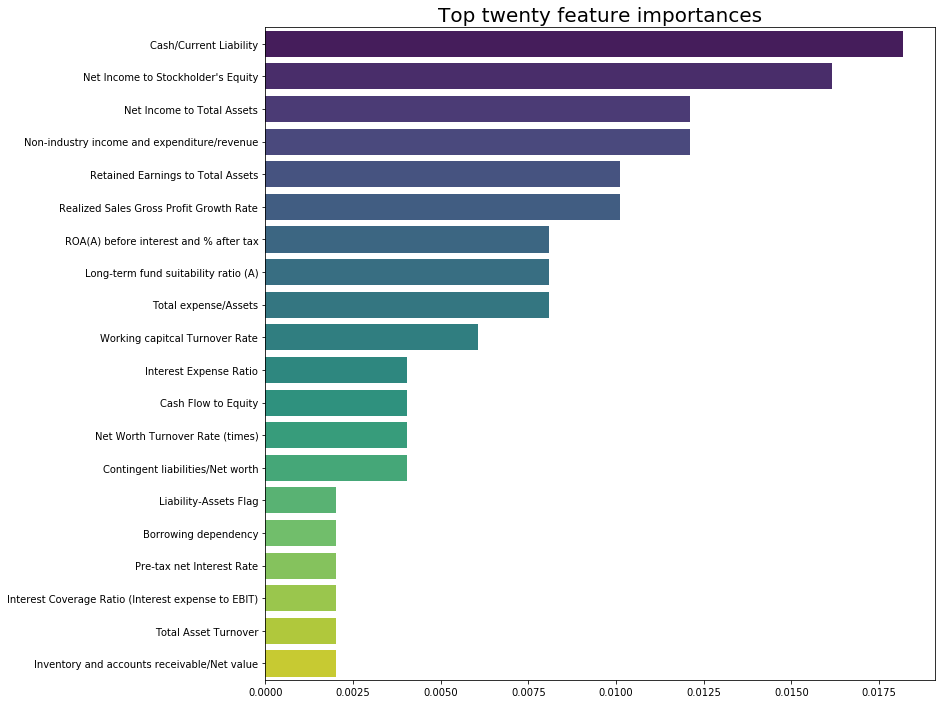

In [6]:
plt.figure(figsize=(12, 12))
plt.title("Top twenty feature importances", fontsize = 20)
sns.barplot(x=feat_importances.values[0:20], y = feat_importances.index.to_list()[0:20], palette="viridis")
plt.show()

---
### 2.2. Confusion matrices

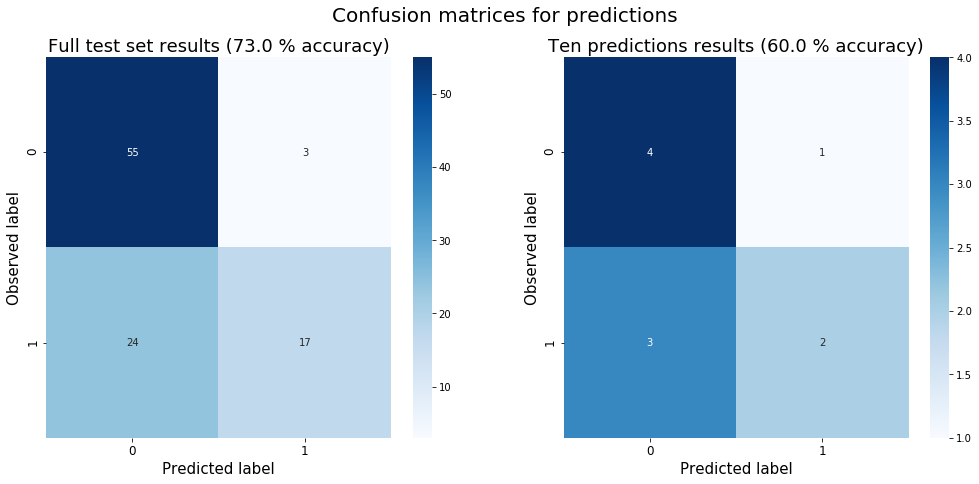

In [7]:
fig, ax = plt.subplots(1,2,figsize=(17,7))
fig.suptitle('Confusion matrices for predictions', fontsize = 20)
sns.heatmap(conf_test, annot=True, ax=ax[0], cmap = "Blues")
ax[0].set_title('Full test set results ({} % accuracy)'.format(str(round(score_test['accuracy'], 2)*100)), fontsize = 18)
ax[0].tick_params(axis='both', which='major', labelsize=12)
ax[0].set_xlabel('Predicted label', fontdict={'size':'15'})
ax[0].set_ylabel('Observed label', fontdict={'size':'15'})
sns.heatmap(conf, annot=True, ax=ax[1], cmap = "Blues")
ax[1].set_title('Ten predictions results ({} % accuracy)'.format(str(round(score['accuracy'], 2)*100)), fontsize = 18)
ax[1].tick_params(axis='both', which='major', labelsize=12)
ax[1].set_xlabel('Predicted label', fontdict={'size':'15'})
ax[1].set_ylabel('Observed label', fontdict={'size':'15'})
plt.show()